# ODE3-L, Second Order Differential Equations

The Euler method can be used for any first order differential equation.  The only real requirements are an initial value for our variable, and the ability to evaluate the derivative.

Although this is a useful technique, most interesting physics equations are second order.  We've already solved several problems using Newton's second law:

$$ F = ma = m \frac{\mathrm{d}v}{\mathrm{d}t} = m\frac{\mathrm{d}^2x}{\mathrm{d}t^2} $$

which is a first order equation in the velocity $v$.  If we want to find the position $x(t)$ in addition to $v(t)$, we have a second order equation to solve.

Fortunately, the technique for solving a second order equation is not much different from solving a first order equation.  Using the example of velocity and position, we will solve for the velocity as we've already learned, and then simply use the fact that $v = \mathrm{d}x/\mathrm{d}t$ to solve for $x$ from our knowledge of $v$.  Our Euler method becomes two simultaneous first-order equations:

$$ v(t+\Delta t) \approx v(t) + \left(\frac{\mathrm{d}v}{\mathrm{d}t}\right) \cdot \Delta t $$
$$ x(t+\Delta t) \approx x(t) + v(t) \cdot \Delta t $$

We now need _two_ initial conditions, $v_0$ and $x_0$.  The original differential equation supplies us with a way to calculate $\mathrm{d}v/\mathrm{d}t$.  The relationship $\mathrm{d}x/\mathrm{d}t = v(t)$ allows us to complete our calculation.  If it helps to think in terms of "old" and "new" values for the velocity and position (this corresponds more closely to the way we build our list of values), we can write the above as

$$ v_\text{new} \approx v_\text{old} + \left(\frac{\mathrm{d}v}{\mathrm{d}t}\right) \cdot \Delta t$$
$$ x_\text{new} \approx x_\text{old} + \left(v_\text{old}\right) \cdot \Delta t $$

#### EXAMPLE

Find the velocity and position of an object which is sliding along a frictionless horizontal surface, but subject to linear air resistance:
$$ F_\text{lin} = -bv $$
The object has a mass of 1.0kg, an initial velocity of 10.0m/s, and a linear drag coefficient $b$ of 1.0kg/s.  Assume the object starts at $x(0) = 0$.  Plot the results from 0 to 3 seconds.


#### SOLUTION

Newton's second law gives us

$$ m\frac{\mathrm{d}v}{\mathrm{d}t} = -bv $$

which we want to rewrite slightly as

$$ \frac{\mathrm{d}v}{\mathrm{d}t} = -\,\frac{b}{m}\,v $$

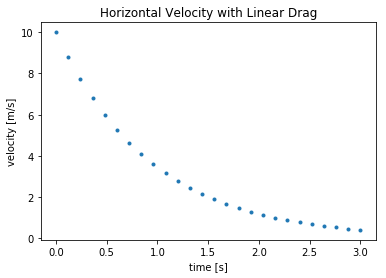

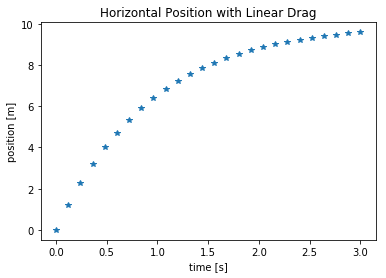

In [7]:
### SOLUTION

# imports
import matplotlib.pyplot as plt

# function definitions
def dvdt(bm, v):
    # bm is b/m, only that combo is relevant
    return -bm * v

# constant initialization
m     = 1.0  # [kg] mass of object
v0    = 10.0 # [m/s] initial velocity
b     = 1.0  # [??] linear drag coefficient
x0    = 0.0  # [m] initial position
t_end = 3.0  # [s] time to end calculations
dt    = t_end / 25 # [s] cleverly choose dt based on t_end

# variable initialization
t_list = [0.0] # [s] time values
v_list = [v0]  # [m/s] velocity values
x_list = [x0]  # [m] position values

# Euler method loop
while t_list[-1] < t_end:
    t = t_list[-1] + dt
    t_list.append(t)
    
    v = v_list[-1] + dt * dvdt(b/m, v_list[-1])
    x = x_list[-1] + dt * v_list[-1]
    
    v_list.append(v)
    x_list.append(x)

# make separate plots for v(t) and x(t)
plt.plot(t_list, v_list, ".")
plt.xlabel("time [s]")
plt.ylabel("velocity [m/s]")
plt.title("Horizontal Velocity with Linear Drag")
plt.show()

plt.plot(t_list, x_list, "*")
plt.xlabel("time [s]")
plt.ylabel("position [m]")
plt.title("Horizontal Position with Linear Drag")
plt.show()

Note that the result was essentially instantaneous, and we can see gaps between the individual calculated points.  This generally means that we should reduce `dt` until the points run together.